In [1]:
# ADL Exercise 3

In [1]:
# This is an implementation of the suggestion in the exercise help document 
# 
import keras 
import gc

class CleanUpCallback(keras.callbacks.Callback):

  # Callback after each epoch
  def on_epoch_end(self,epochs,logs=None):
    # print(f"Loss: {logs['loss']}")
    print("Cleaning up after each epoch to save memory")
    gc.collect()  

In [2]:
# import Dataset from given link
# Get dataset from keras 
from keras.datasets import mnist
import matplotlib.pyplot as plt 
import sys
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from keras.callbacks import EarlyStopping
import numpy as np
import tensorflow as tf

In [3]:
# Preparing data for processing
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# reshape dataset 
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
# One hot encode label values
trainy = tf.one_hot(trainy.astype(np.int32), depth=10)
testy = tf.one_hot(testy.astype(np.int32), depth=10)
# Normalize the input values for the training and testing data
trainX_norm = trainX.astype('float32')
testX_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = trainX_norm / 255.0
test_norm = testX_norm / 255.0 


11501568/11490434 [==============================] - 0s 0us/step


In [4]:
def create_model():
    model = Sequential()
    # Add a convolution layer
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    # Add a pooling layer
    model.add(MaxPooling2D((2, 2)))
    # Add another conv layer
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # Configure the model
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # Configure Early Stopping callback
    es = EarlyStopping(monitor='loss', min_delta=0, patience=3, verbose=0, mode='auto')    
    # Train the model
    history = model.fit(train_norm, trainy, epochs=50, batch_size=128, verbose=1,validation_split=0.2,callbacks=[CleanUpCallback(),es])
    model.save(f"models/mnist_no_batch_normalization")
    # scores.append(history)
    print(model.summary())
    return model,history


In [5]:
# List for validation loss
loss = []
# List for training loss
train_loss = []

In [6]:
if __name__ == "__main__":
    
    print("Creating model...")

    print("Training model...")
    model,history = create_model()
    # Plot the accuracy
    print("Storing scores...")
    # Store validation accuracy and loss 
    loss.append(history.history["val_loss"])
    # Store training accuracy and loss
    train_loss.append(history.history["loss"])


Creating model...
Training model...
Epoch 1/50
375/375 [==============================] - 17s 11ms/step - loss: 0.2120 - accuracy: 0.9352 - val_loss: 0.0706 - val_accuracy: 0.9786
Epoch 2/50
375/375 [==============================] - 4s 10ms/step - loss: 0.0646 - accuracy: 0.9807 - val_loss: 0.0622 - val_accuracy: 0.9833
Epoch 3/50
375/375 [==============================] - 4s 10ms/step - loss: 0.0468 - accuracy: 0.9854 - val_loss: 0.0460 - val_accuracy: 0.9862
Epoch 4/50
375/375 [==============================] - 4s 10ms/step - loss: 0.0353 - accuracy: 0.9893 - val_loss: 0.0543 - val_accuracy: 0.9849
Epoch 5/50
375/375 [==============================] - 4s 10ms/step - loss: 0.0271 - accuracy: 0.9914 - val_loss: 0.0521 - val_accuracy: 0.9853
Epoch 6/50
375/375 [==============================] - 4s 9ms/step - loss: 0.0220 - accuracy: 0.9929 - val_loss: 0.0451 - val_accuracy: 0.9868
Epoch 7/50
375/375 [==============================] - 4s 9ms/step - loss: 0.0177 - accuracy: 0.9944 - val_

In [7]:
#  New model with BatchNormalization layer

In [8]:
# Import necessary layers
from keras.layers import BatchNormalization

In [9]:
def create_model():
    model = Sequential()
    # First Conv layer
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    # Second Conv layer
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    # Fully Connected Layer
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    
    # Output Layer
    model.add(Dense(10, activation='softmax'))
    # Configure the model
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # Configure Early Stopping callback
    es = EarlyStopping(monitor='loss', min_delta=0, patience=3, verbose=0, mode='auto')    
    # Train the model
    history = model.fit(train_norm, trainy, epochs=50, batch_size=128, verbose=1,validation_split=0.2,callbacks=[CleanUpCallback(),es])
    model.save(f"models/mnist_batch_normalization")
    # scores.append(history)
    print(model.summary())
    return model,history

Creating model...
Training model...
Epoch 1/50
375/375 [==============================] - 6s 13ms/step - loss: 0.1594 - accuracy: 0.9536 - val_loss: 0.1481 - val_accuracy: 0.9572
Epoch 2/50
375/375 [==============================] - 4s 11ms/step - loss: 0.0452 - accuracy: 0.9865 - val_loss: 0.0672 - val_accuracy: 0.9803
Epoch 3/50
375/375 [==============================] - 4s 11ms/step - loss: 0.0273 - accuracy: 0.9925 - val_loss: 0.0437 - val_accuracy: 0.9864
Epoch 4/50
375/375 [==============================] - 4s 12ms/step - loss: 0.0192 - accuracy: 0.9944 - val_loss: 0.0365 - val_accuracy: 0.9897
Epoch 5/50
375/375 [==============================] - 4s 12ms/step - loss: 0.0130 - accuracy: 0.9965 - val_loss: 0.0391 - val_accuracy: 0.9889
Epoch 6/50
375/375 [==============================] - 4s 11ms/step - loss: 0.0092 - accuracy: 0.9977 - val_loss: 0.0423 - val_accuracy: 0.9882
Epoch 7/50
375/375 [==============================] - 4s 11ms/step - loss: 0.0071 - accuracy: 0.9983 - val

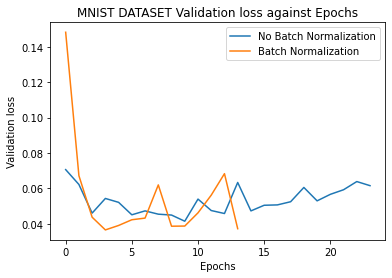

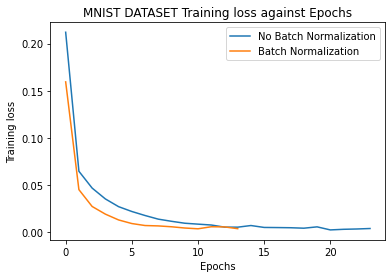

In [10]:
# Main entry point for model training

if __name__ == "__main__":
    
    print("Creating model...")

    print("Training model...")
    model,history = create_model()
    # Plot the accuracy
    print("Storing scores...")
    # Store validation accuracy and loss 
    loss.append(history.history["val_loss"])
    # Store training accuracy and loss
    train_loss.append(history.history["loss"])

    plt.plot([i*100 for i in loss[0]],label="No Batch Normalization")
    plt.plot([j*100 for j in loss[1]],label="Batch Normalization")
    plt.xlabel("Epochs")
    plt.ylabel("Validation loss(%)")
    plt.title("MNIST DATASET Validation loss against Epochs")
    plt.legend()  
    plt.show()

    # Plot training loss 
    plt.plot([x*100 for x in train_loss[0]],label="No Batch Normalization")
    plt.plot([y*100 for y in train_loss[1]],label="Batch Normalization")
    plt.xlabel("Epochs")
    plt.ylabel("Training loss(%)")
    plt.title("MNIST DATASET Training loss against Epochs")
    plt.legend()  
    plt.show()

In [13]:
# Testing the model to find the loss score
from tensorflow.keras.models import load_model
import os
models_path = os.listdir("models/") 
scores = []
for model in models_path:
  print(model)
  model = load_model("models/"+model+"/")
  results = model.evaluate(test_norm,testy,batch_size=128)
  scores.append(results)

mnist_no_batch_normalization
79/79 [==============================] - 1s 8ms/step - loss: 0.0443 - accuracy: 0.9893
mnist_batch_normalization
79/79 [==============================] - 1s 9ms/step - loss: 0.0387 - accuracy: 0.9891


In [ ]:
# Plot previous graph in classification error percentage as required 

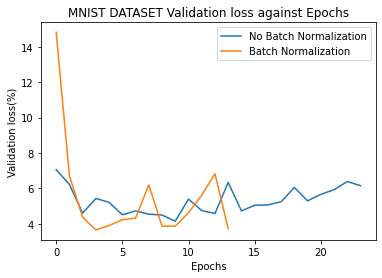

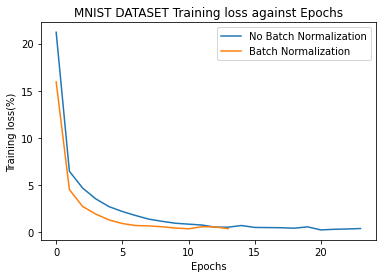

In [14]:
plt.plot([i*100 for i in loss[0]],label="No Batch Normalization")
plt.plot([j*100 for j in loss[1]],label="Batch Normalization")
plt.xlabel("Epochs")
plt.ylabel("Validation loss(%)")
plt.title("MNIST DATASET Validation loss against Epochs")
plt.legend()  
plt.show()

# Plot training loss 
plt.plot([x*100 for x in train_loss[0]],label="No Batch Normalization")
plt.plot([y*100 for y in train_loss[1]],label="Batch Normalization")
plt.xlabel("Epochs")
plt.ylabel("Training loss(%)")
plt.title("MNIST DATASET Training loss against Epochs")
plt.legend()  
plt.show()